# Еще немного о map и filter
Больше chain операторов у последовательностей делают их все больше похожими на потоки

In [1]:
a = 'dfsddg'
b = [1, 4, 6]
list(map(lambda x: x.upper(), a))

['D', 'F', 'S', 'D', 'D', 'G']

In [2]:
list(filter(lambda x: x % 2 == 0, b))

[4, 6]

In [3]:
list(map(lambda x: x ** 2, filter(lambda x: x % 2 == 0, b)))

[16, 36]

# Вернемся к задачке про приток воды в резервуар, как округлять?
Напомню, у нас есть резервуар емкостью N, есть дневной размер притока, и фиксированный размер испарения в день, как нам вычислить за сколько дней резервуар заполнится водой, используя только арифмитические операции?
[Решение было в ноутбуке позапрошлого семинара, можно потом посмотреть](https://github.com/ivan-digital/python_basics_2024/blob/main/seminar_3_sequences.ipynb)

Сейчас, давайте обсудим.

## Теория

- Как в памяти хранится list? В чем отличие tuple от list?
- Что такое функция в Python? В чем ее схожесть с другими типами?
- Что такое рекурсия? Что стоит определить в первую очередь, когда вы используете ее используете?
- В чем идея бинарного поиска?

## Задачки

### GCD

In [ ]:
def gcd_recursive(a, b):
    if b == 0:
        return a
    else:
        return gcd_recursive(b, a % b)

In [ ]:
gcd_recursive(4, 6)

2

In [ ]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

In [ ]:
gcd(5, 10)

5

### Валидация строк с открывающимися и закрывающимися скобками
Дана строка s, содержащая только символы '(', ')', '{', '}', '[' и ']', нужно определить, является ли входная строка корректной.

In [94]:
tests = ['(())', '())',  '((4))()', '', ')', '()[]{}', '(]', '([)]]{}',]
# (()
reference = [True, False, True, True, False, True, False, False]

In [97]:
def isValid(s: str) -> bool:
    stack = []
    mapping = {")": "(", "}": "{", "]": "["}
    for char in s:
        if char in mapping:
            top_element = stack.pop() if stack else '#'
            if mapping[char] != top_element:
                return False
        elif char in mapping.values():
            stack.append(char)
    return not stack

for test, ref in zip(tests, reference):
    print(isValid(test) == ref)
    # Сложность вычислительная O(N) и сложность по памяти O(N)

True
True
True
True
True
True
True
True


Какая алгоритмическая сложность у этого решения, вычислительная и по памяти?

### Бинпоиск со сдвигом

Дан отсортированный набор элементов с некоторым сдвигом.

На вход подается элемент. Найти его индекс.

    [9, 10, 11, 11, 12, 0, 1, 3, 7], х = 12
    Ответ: 4
    
- Подсказка: подумайте, как можно модифицировать алгоритм бинпоиска для этой задачи

Какая алгоритмическая сложность у этого решения, вычислительная и по памяти?

In [ ]:
a = [7, 7, 9, 10, 11, 11, 12, 0, 1, 3, 7, 7]

In [ ]:
def find_shift(arr: list) -> int:
    if arr[0] < arr[-1]:
        return -1

    low = 0
    high = len(arr) - 1

    while low < high - 1:
        mid = (low + high) // 2

        if arr[0] >= arr[mid]:
            high = mid
        else:
            low = mid

    return low

# Регулярные выражения


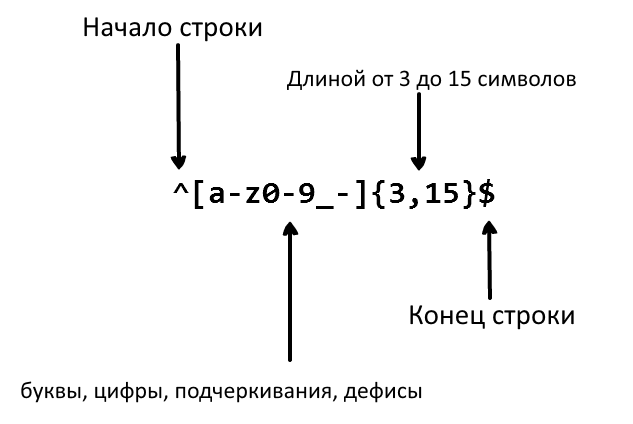

Полезные ссылки:

https://habr.com/ru/post/349860/

https://uneex.org/HSE/ProgrammingOS/15_Regexp
    
https://regexone.com/    
    
https://ravesli.com/regulyarnye-vyrazheniya-osnovy/
    
https://regex101.com/

Pattern matching / searching:
- Pattern -- это некоторая строка из спецсимволов, которая описывает, что мы хотим найти
- Matching -- определение, соответствует ли строка заданному паттерну
- Searching -- поиск подстрок, соответствующих паттерну, в тексте

In [101]:
import re
re.match('a', 'baaa')

In [106]:
re.search('g', 'baaagg')

<re.Match object; span=(4, 5), match='g'>

### Основные правила:

#### Общее
- любой неспециальный символ матчит себя
- "." матчит любой символ
- "[abc]" матчит любой символ внутри множества
- "[A-z]", "[0-9]" и прочие сокращения (множества символов подряд в таблице ascii)
- "a*" -- звездочка означает 0 или больше указанных символов подряд
- "a+" -- + означает 1 или более указанных символов подряд
- "a{2,}" -- N или больше символов подряд
- "a?" -- один или ни одного
- "a{1, 5}" -- в фигурных скобках можно указать точное количество. Левая цифра означает минимальное, правая -- максимальное
- "^regexp" -- только подстроки в начале строки
- "rgexp$" -- только подстроки, находящиеся в конце строки
- \b -- граница слова
- (..) -- группа

#### Специальные обобщающие символы
`\{small_letter}` -- специальный символ
`\{big_letter}` -- любой символ кроме специального символа

- \s -- пробельные символы
- \d -- цифра
- \w -- буква или _

#### Lookarounds
- "(?=...)" -- positive lookahead
- "(?<=...)" -- positive lookbehind
- "(?!...)" -- negative lookahead
- "(?<!...)" -- negative loookbehind

и прочее и прочее...


**Дисклеймер**: Написать регулярку может быть гораздо сложнее, чем потом прочитать!

### Разберем несколько примеров

In [ ]:
import re

In [119]:
sample_string = 'Hello, world!'

In [113]:
pattern = re.compile('[hH]ello')
pattern.match(sample_string)

<re.Match object; span=(0, 5), match='Hello'>

In [114]:
pattern.findall(sample_string)

['Hello']

In [120]:
m = re.match(r'[hH]ello,? [A-z]*[.!]?$', sample_string) # если добавить $ - должно мачится целиком

In [121]:
sample_string[m.start():m.end()]

'Hello, world!'

In [123]:
m.group()

'Hello, world!'

In [130]:
grouped_match = re.match(r'[hH]ello,? ([a-z]*[.!])?', sample_string) # () группа, но если убрать, просто условие

In [131]:
grouped_match.group()

'Hello, world!'

In [132]:
grouped_match.groups()

('world!',)

In [133]:
re.search(r'\d{1,3}', 'rfhe97346fevbv78')

<re.Match object; span=(4, 7), match='973'>

In [144]:
re.findall(r'\d{3,5}', 'rfhe97344fevbv78')

['97344']

In [145]:
re.sub(r'\d{3,5}', 'цифры', 'rfhe97344fevbv78')

'rfheцифрыfevbv78'

**Lookarounds**

In [79]:
er_words = 'math teacher physics teacher scheduler funny monster creepy monster'

In [148]:
for m in re.finditer('\w+ (?=teacher)', er_words):
    print(er_words[m.start():m.end()])

math 
physics 


In [152]:
re.findall('(\w+) (?=teacher)', er_words)

['math', 'physics']

Задача, как смачить только слово, наверху мачится пробел

In [82]:
for m in re.finditer('(?<!math) teacher', er_words):
    print(m.start(), m.end(), er_words[m.start():m.end()])

20 28  teacher


## Practice Tasks

### Remove stops

In [158]:
stopwords = ['отличный', 'хороший', 'это', 'я']
regexp_stops = '|'.join(fr"\b{word}\b" for word in stopwords) # вспоминаем f и r литералы
regexp_chars = r'[!?.,\s\n\t-_]+'

text = 'Я хочу продать отличный автомобиль внедорожник не бит, не крашен фиолетовый!!'

cleaned_text = re.sub(regexp_stops, '', text, flags=re.IGNORECASE) # re.IGNORECASE - что смачить заглавные
cleaned_text = re.sub(regexp_chars, ' ', cleaned_text)
cleaned_text

' хочу продать автомобиль внедорожник не бит не крашен фиолетовый '

### Ошибся со временем

Вы написали длинное письмо, где описали свои планы на день с указанием конкретных временных промежутков. Однако позже вы осознали, что на самом деле забыли об одном важном деле, и теперь все даты в вашем письме неверные. Напишите программу, которая заменяет все временные указания на строчку TBD

*Пример:*

`Уважаемый Д.! Если вы к 11:00 пятницы не подготовите свой семинар, то уже в 11:00:01 я за себя не отвечаю.
Нужно нагененировать хотя бы 4 задачи и успеть разобрать в идеале 80:100 из них`

->

`Уважаемый Д.! Если вы к (TBD) пятницы не подготовите свой семинар, то уже в (TBD) я за себя не отвечаю.
Нужно нагененировать хотя бы 4 задачи и успеть разобрать в идеале 80:100 из них`

In [170]:
text = 'Уважаемый Д.! Если вы к 25:00 пятницы не подготовите свой семинар, то уже в 11:00:01 я за себя не отвечаю. 21:00. 25:00. Нужно нагененировать хотя бы 4 задачи и успеть разобрать в идеале 80:100 из них'

# тут можно рассматривать вложенные группы как граф
# начните с того, как мачить часы, а в часах первое число

# your code
regexp_time = r'\b(([01][0-9])|(2[0-4])):([0-5][0-9])(:[0-5][0-9])?\b'
re.sub(regexp_time, '(TBD)', text)

'Уважаемый Д.! Если вы к 25:00 пятницы не подготовите свой семинар, то уже в (TBD) я за себя не отвечаю. (TBD). 25:00. Нужно нагененировать хотя бы 4 задачи и успеть разобрать в идеале 80:100 из них'

## Опциональные задачи

### Парсинг таблицы игр (0.5)

In [ ]:
match_results = '''
Aston Villa (London) 1 1 Man City (Manchester)
Brentford (Brentford) 5 2 Leeds United (Leeds)
Chelsea (London) 2 1 West Ham (London)
Newcastle United (Newcastle) 0 0 Crystal Palace (London)
Nottm Forest (Nottighham) 2 3 AFC Bournemouth (Bournemouth)
Tottenham (London) 2 1 Fulham (London)
Wolverhampton Wanderers (Wolverhampton) 1 1 Southampton (Southampton)
Everton (Liverpool) 0 0 Liverpool (Liverpool)
'''

1. Достаньте все города из текста

In [ ]:
# your code

2. Все названия команд

In [ ]:
# your code

3. Все счета матчей

In [ ]:
# your code

### Погенерируем пароли (1.5)

Вы наконец-то обеспокоились своей безопасностью в сети и решили обновить все свои пароли. Однако придумывать все самим для всех ваших сайтов вам, конечно, лень. Поэтому вы решили написать программу, которая это сделает за вас!

Сгенерируйте случайный пароль длины N. Убедитесь, что получившийся пароль на самом деле хороший. В нашем случае это:
1. Содержит хотя бы две заглавные буквы подряд
2. Содержит хотя бы две строчные буквы подряд
3. Не содержит пробельные спецсимволы (\t, \n и подобные)
4. Не содержит трех цифр подряд
5. Содержит и русские, и английские буквы

Ваш код должен генерировать пароли, пока они не удовлетворят заданным условиям.

Как мы можем оптимизировать проверку корректности генерации пароля?

hint: используйте модуль random